# THE SPARK FOUNDATION JUNE '21 

### Objective:
● Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

● Use animation, timeline and annotations to create attractive and interactive dashboards and story

● Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

### Author : Prateek Joshi
B.E - Computer science and Engineering
College : Government Engineering College Banswara Rajasthan

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



## Reading the Dataset

In [2]:
covid_data = pd.read_csv (r'covid_data_csv.csv')

In [3]:
#Top 10 rows of dataset
print(covid_data)

      iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
92786      ZWE    Africa     Zimbabwe  2021-05-28      38918.0       64.0   
92787      ZWE    Africa     Zimbabwe  2021-05-29      38933.0       15.0   
92788      ZWE    Africa     Zimbabwe  2021-05-30      38944.0       11.0   
92789      ZWE    Africa     Zimbabwe  2021-05-31      38961.0       17.0   
92790      ZWE    Africa     Zimbabwe  2021-06-01      38998.0       37.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  .

## Information of the Dataset

In [4]:
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92791 entries, 0 to 92790
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92791 non-null  object 
 1   continent                              88392 non-null  object 
 2   location                               92791 non-null  object 
 3   date                                   92791 non-null  object 
 4   total_cases                            89951 non-null  float64
 5   new_cases                              89950 non-null  float64
 6   new_cases_smoothed                     88938 non-null  float64
 7   total_deaths                           80028 non-null  float64
 8   new_deaths                             80186 non-null  float64
 9   new_deaths_smoothed                    88938 non-null  float64
 10  total_cases_per_million                89470 non-null  float64
 11  ne

In [5]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.995100e+04,8.995000e+04,88938.000000,8.002800e+04,80186.000000,88938.000000,89470.000000,89469.000000,88462.000000,79560.000000,...,83500.000000,56478.000000,83681.000000,85604.000000,65503.000000,64542.000000,42048.000000,76291.000000,88112.000000,83860.000000
mean,9.468349e+05,6.063400e+03,6080.376189,2.544549e+04,142.319545,127.265312,11621.884609,76.093384,76.326154,253.018458,...,19292.420100,13.383540,258.157224,7.884512,10.540707,32.674370,50.870727,3.028586,73.232977,0.727689
std,6.533073e+06,3.859747e+04,37879.000942,1.517258e+05,781.930528,722.035348,21862.808441,201.018343,158.258986,441.270712,...,19962.688936,19.955253,118.900699,4.074640,10.429524,13.477791,31.761174,2.460887,7.562312,0.150397
min,1.000000e+00,-3.486670e+05,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-5160.525000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.094000e+03,2.000000e+00,7.143000,4.900000e+01,0.000000,0.000000,228.590000,0.207000,1.234000,7.510750,...,4466.507000,0.600000,167.295000,5.310000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.206200e+04,7.100000e+01,88.857000,3.410000e+02,2.000000,1.286000,1561.156000,7.992000,10.570000,45.903000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000
75%,1.276445e+05,7.880000e+02,828.571000,3.325000e+03,18.000000,14.143000,11638.734250,70.613000,79.286000,278.783000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000
max,1.710582e+08,1.498213e+06,826374.286000,3.561896e+06,17906.000000,14436.286000,177687.180000,18293.675000,4083.500000,3080.737000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


## Checking for count of all the unique values present for each attribute

In [6]:
covid_data.nunique()

iso_code                                   230
continent                                    6
location                                   230
date                                       518
total_cases                              49196
new_cases                                12302
new_cases_smoothed                       23653
total_deaths                             18745
new_deaths                                2891
new_deaths_smoothed                       6519
total_cases_per_million                  69780
new_cases_per_million                    39467
new_cases_smoothed_per_million           44567
total_deaths_per_million                 43477
new_deaths_per_million                    7413
new_deaths_smoothed_per_million           8799
reproduction_rate                          366
icu_patients                              2497
icu_patients_per_million                  5303
hosp_patients                             4886
hosp_patients_per_million                 8799
weekly_icu_ad

## Checking for count of NULL values for each column:

In [7]:
covid_data.isnull().sum()

iso_code                                     0
continent                                 4399
location                                     0
date                                         0
total_cases                               2840
new_cases                                 2841
new_cases_smoothed                        3853
total_deaths                             12763
new_deaths                               12605
new_deaths_smoothed                       3853
total_cases_per_million                   3321
new_cases_per_million                     3322
new_cases_smoothed_per_million            4329
total_deaths_per_million                 13231
new_deaths_per_million                   13073
new_deaths_smoothed_per_million           4329
reproduction_rate                        18136
icu_patients                             83460
icu_patients_per_million                 83460
hosp_patients                            81193
hosp_patients_per_million                81193
weekly_icu_ad

## Continents in terms of occurence of covid cases on basis of iso_codes

In [8]:
covid_data.continent.value_counts()[0:10]

Africa           24009
Asia             22129
Europe           22038
North America    11348
South America     5619
Oceania           3249
Name: continent, dtype: int64

In [9]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
raw_df_latest_date = covid_data['date'].to_list()[-1].strftime('%b %d, %Y')

### Top 8 Countries with Most Cases

Text(0.5, 1.0, 'BARGRAPH OF TOP 8 COUNTRIES (total cases))')

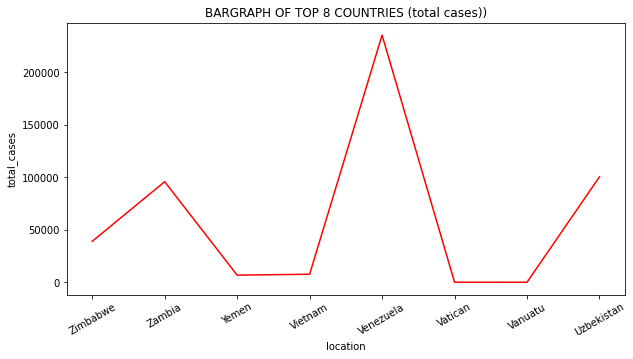

In [10]:
#BARGRAPH OF TOP 8 COUNTRIES WITH MAXIMUM NEW CASES
max_cases=covid_data.sort_values("location", ascending=False)
max_cases = max_cases[max_cases['date']==raw_df_latest_date]
max_cases = max_cases[~max_cases['location'].isin(['World','International'])]

plt.figure(figsize=(10,5))
sns.lineplot(x='location', y='total_cases', data=max_cases[0:8], color='red')
#sns.barplot(x='location', y='total_cases', data=covid_data[0:5])
plt.xticks(x='location', rotation=30)
plt.yticks(y='total_cases')
plt.title("BARGRAPH OF TOP 8 COUNTRIES (total cases))")

## Collecting Asia Data from the given dataset

In [11]:
#from pandas.api.types import is_numeric_type

asia_data = covid_data[covid_data['continent'] == 'Asia']
asia_data = asia_data[asia_data['date']==raw_df_latest_date]
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
463,AFG,Asia,Afghanistan,2021-06-01,72977.0,1139.0,867.714,2973.0,29.0,19.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
4296,ARM,Asia,Armenia,2021-06-01,222778.0,108.0,91.286,4445.0,7.0,6.429,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
6271,AZE,Asia,Azerbaijan,2021-06-01,334132.0,176.0,176.857,4921.0,8.0,6.286,...,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.70,73.00,0.756
7178,BHR,Asia,Bahrain,2021-06-01,242790.0,2259.0,2739.571,1009.0,29.0,20.429,...,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29,0.852
7634,BGD,Asia,Bangladesh,2021-06-01,802305.0,1765.0,1444.143,12660.0,41.0,31.286,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
10487,BTN,Asia,Bhutan,2021-06-01,1632.0,12.0,29.857,1.0,0.0,0.000,...,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.70,71.78,0.654
12739,BRN,Asia,Brunei,2021-06-01,244.0,2.0,1.143,3.0,0.0,0.000,...,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.70,75.86,0.838
14559,KHM,Asia,Cambodia,2021-06-01,30710.0,616.0,625.857,220.0,6.0,5.286,...,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.80,69.82,0.594
17944,CHN,Asia,China,2021-06-01,91197.0,24.0,18.143,4636.0,0.0,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
32040,GEO,Asia,Georgia,2021-06-01,345196.0,1233.0,840.143,4804.0,31.0,21.429,...,9745.079,4.2,496.218,7.11,5.3,55.5,NaN,2.60,73.77,0.812


### Collecting Total Deaths in Asia Region

In [12]:
asia_deaths = asia_data.sort_values("total_deaths", ascending = False)
asia_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38853,IND,Asia,India,2021-06-01,28175044.0,0.0,145321.286,331895.0,0.0,2929.571,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
40260,IRN,Asia,Iran,2021-06-01,2923823.0,10687.0,9775.286,80327.0,171.0,181.571,...,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.783
39310,IDN,Asia,Indonesia,2021-06-01,1826527.0,4824.0,5762.857,50723.0,145.0,156.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
85933,TUR,Asia,Turkey,2021-06-01,5256516.0,7112.0,7590.143,47656.0,129.0,147.857,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
67019,PHL,Asia,Philippines,2021-06-01,1235467.0,5166.0,6685.000,21012.0,46.0,141.857,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.00,71.23,0.718
64222,PAK,Asia,Pakistan,2021-06-01,924667.0,1843.0,2298.714,20930.0,80.0,66.429,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.60,67.27,0.557
40724,IRQ,Asia,Iraq,2021-06-01,1205522.0,4170.0,4077.429,16405.0,30.0,23.429,...,15663.986,2.5,218.612,8.83,NaN,NaN,94.576,1.40,70.60,0.674
43218,JPN,Asia,Japan,2021-06-01,749829.0,2641.0,3320.429,13107.0,101.0,92.857,...,39002.223,NaN,79.370,5.72,11.2,33.7,NaN,13.05,84.63,0.919
7634,BGD,Asia,Bangladesh,2021-06-01,802305.0,1765.0,1444.143,12660.0,41.0,31.286,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
43745,JOR,Asia,Jordan,2021-06-01,737284.0,750.0,835.429,9472.0,10.0,12.571,...,8337.490,0.1,208.257,11.75,NaN,NaN,NaN,1.40,74.53,0.729


### Collecting most death regions in Asia 

In [13]:
most_asia_deaths = asia_deaths.sort_values("total_deaths",ascending =False)
most_asia_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38853,IND,Asia,India,2021-06-01,28175044.0,0.0,145321.286,331895.0,0.0,2929.571,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
40260,IRN,Asia,Iran,2021-06-01,2923823.0,10687.0,9775.286,80327.0,171.0,181.571,...,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.783
39310,IDN,Asia,Indonesia,2021-06-01,1826527.0,4824.0,5762.857,50723.0,145.0,156.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
85933,TUR,Asia,Turkey,2021-06-01,5256516.0,7112.0,7590.143,47656.0,129.0,147.857,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
67019,PHL,Asia,Philippines,2021-06-01,1235467.0,5166.0,6685.000,21012.0,46.0,141.857,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.00,71.23,0.718
64222,PAK,Asia,Pakistan,2021-06-01,924667.0,1843.0,2298.714,20930.0,80.0,66.429,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.60,67.27,0.557
40724,IRQ,Asia,Iraq,2021-06-01,1205522.0,4170.0,4077.429,16405.0,30.0,23.429,...,15663.986,2.5,218.612,8.83,NaN,NaN,94.576,1.40,70.60,0.674
43218,JPN,Asia,Japan,2021-06-01,749829.0,2641.0,3320.429,13107.0,101.0,92.857,...,39002.223,NaN,79.370,5.72,11.2,33.7,NaN,13.05,84.63,0.919
7634,BGD,Asia,Bangladesh,2021-06-01,802305.0,1765.0,1444.143,12660.0,41.0,31.286,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
43745,JOR,Asia,Jordan,2021-06-01,737284.0,750.0,835.429,9472.0,10.0,12.571,...,8337.490,0.1,208.257,11.75,NaN,NaN,NaN,1.40,74.53,0.729


"# save file\nif save_files:\n  if not os.path.exists('plots'):\n    os.makedirs('plots')\n  filename = 'plots/most_asia_deaths'\n  plt.savefig(filename, bbox_inches = 'tight')"

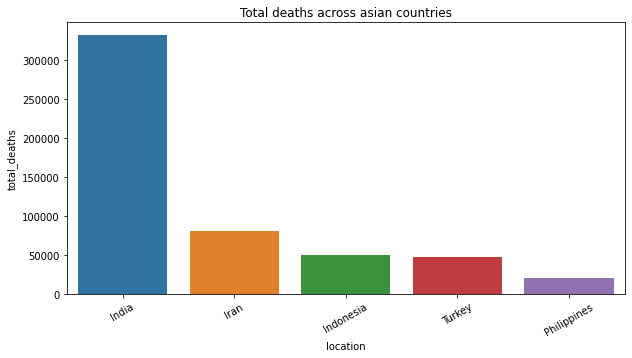

In [14]:
plt.figure(figsize=(10,5))
#sns.lineplot(x='location', y='total_deaths', data=top_10_deaths[0:10], color='red')
sns.barplot(x='location', y='total_deaths', data=most_asia_deaths[0:5])
plt.xticks(x='location', rotation=30)
plt.yticks(y='total_deaths')
plt.title("Total deaths across asian countries")

"""# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/most_asia_deaths'
  plt.savefig(filename, bbox_inches = 'tight')"""

### Least Asia Cases 

In [15]:
least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
17944,CHN,Asia,China,2021-06-01,91197.0,24.0,18.143,4636.0,0.0,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
90931,VNM,Asia,Vietnam,2021-06-01,7625.0,193.0,242.000,48.0,1.0,0.571,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
91910,YEM,Asia,Yemen,2021-06-01,6751.0,9.0,11.571,1322.0,1.0,1.571,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
46444,LAO,Asia,Laos,2021-06-01,1929.0,17.0,7.286,3.0,0.0,0.143,...,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.50,67.92,0.613
82301,TWN,Asia,Taiwan,2021-06-01,8842.0,331.0,483.714,137.0,13.0,14.571,...,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN


Text(0.5, 1.0, 'Total deaths across Asia (Top 10 countries)')

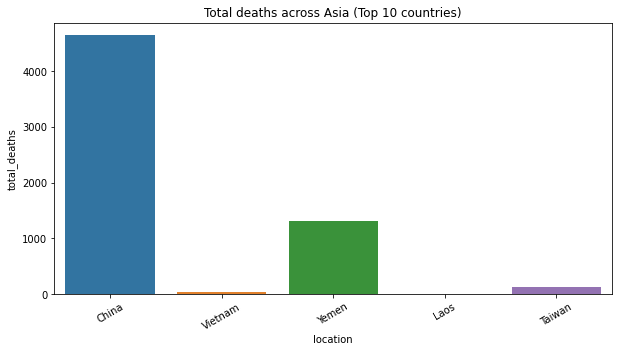

In [16]:
plt.figure(figsize=(10,5))
#sns.lineplot(x='location', y='total_deaths', data=top_10_deaths[0:10], color='red')
sns.barplot(x='location', y='total_deaths', data=least_asia_cases[0:5])
plt.xticks(x='location', rotation=30)
plt.yticks(y='total_deaths')
plt.title("Total deaths across Asia (Top 10 countries)")


##  Total Cases v/s Total Deaths 


Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

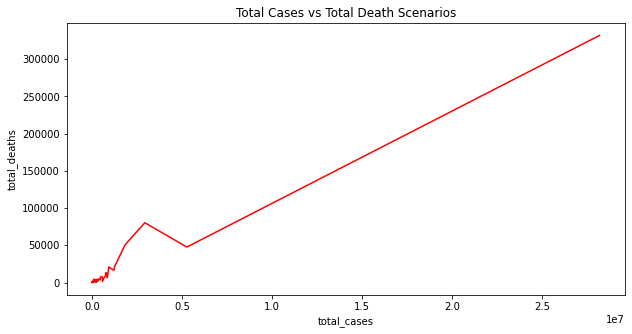

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="red")
plt.title("Total Cases vs Total Death Scenarios")

From the above graph it can be concluded that, as the total number of cases increased, Descent increase was noticed in number of deaths due to Covid-19

## Correlation Heatmap


In [18]:
#Filtering columns of dataset
df_asia=asia_data[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
463,2021-06-01,72977.0,1139.0,2973.0,NaN,NaN,Afghanistan,0.745,NaN,NaN,NaN,29.0
4296,2021-06-01,222778.0,108.0,4445.0,NaN,NaN,Armenia,2.362,NaN,NaN,NaN,7.0
6271,2021-06-01,334132.0,176.0,4921.0,4815.0,3513989.0,Azerbaijan,0.789,346.575,0.475,NaN,8.0
7178,2021-06-01,242790.0,2259.0,1009.0,17285.0,4643466.0,Bahrain,17.043,2728.909,10.158,NaN,29.0
7634,2021-06-01,802305.0,1765.0,12660.0,NaN,NaN,Bangladesh,0.249,NaN,NaN,NaN,41.0


<AxesSubplot:>

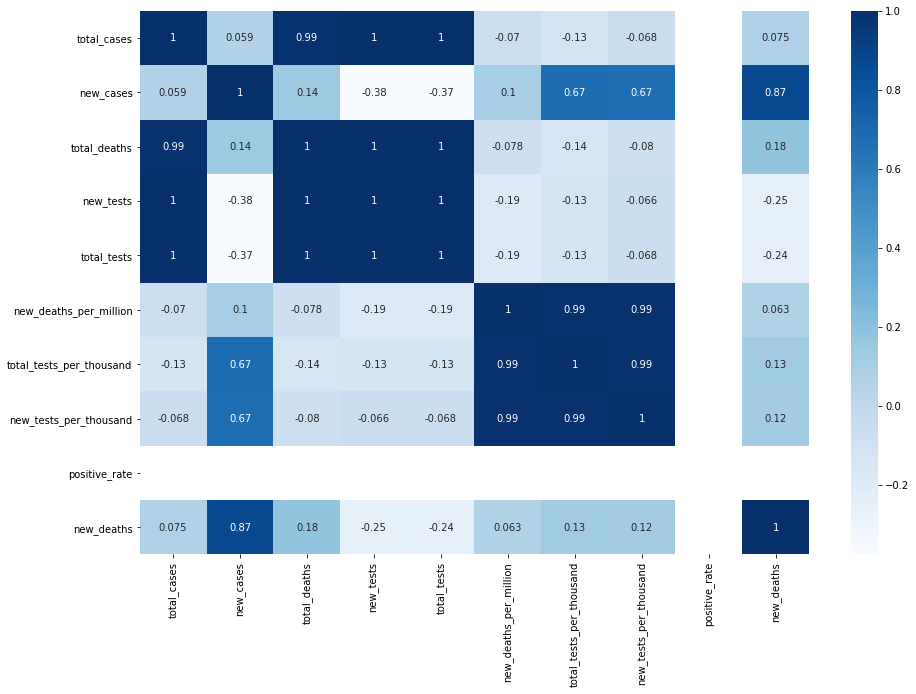

In [19]:
# Correlation Heatmap
fig=plt.figure(figsize=(15,10))

sns.heatmap(df_asia.corr(),cmap="Blues",annot=True)

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

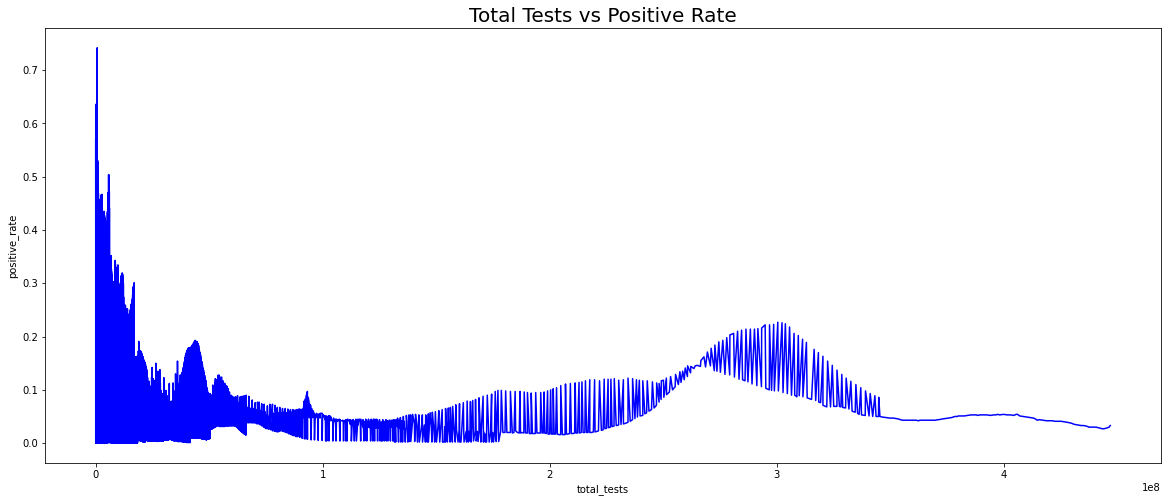

In [20]:
#Lineplot of Total number of tests and Positive rate
plt.figure(figsize=(20,8))
sns.lineplot(x='total_tests',y='positive_rate',data=covid_data,color="blue")
plt.title("Total Tests vs Positive Rate",fontsize=20)

From the above graph, it is observed that as the number of testing increase, there is gradual increase in Covid-19 positive patients.

### Subplot of countries with maximum vaccinated people and least number of vaccinated people in world

In [21]:
#Subplot of countries with maximum vaccinated people and least number of vaccinated people
vaccination_data=covid_data[covid_data["date"]=="2021-03-21"]
vaccination_data=vaccination_data[~vaccination_data["location"].isin(["World","International"])]
max_vaccinated=vaccination_data.sort_values("total_vaccinations",ascending= False)
max_vaccinated.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
4785,OWID_ASI,NaN,Asia,2021-03-21,26981166.0,125343.0,114063.429,416502.0,889.0,909.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61670,OWID_NAM,NaN,North America,2021-03-21,34363806.0,42237.0,66485.429,791158.0,718.0,1597.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88371,USA,North America,United States,2021-03-21,29821754.0,33768.0,54438.286,543004.0,440.0,1024.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
28347,OWID_EUR,NaN,Europe,2021-03-21,37786630.0,161266.0,188432.143,879694.0,2039.0,3101.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28843,OWID_EUN,NaN,European Union,2021-03-21,25142828.0,126906.0,147242.571,591181.0,1353.0,2166.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
least_vaccinated=vaccination_data.sort_values("total_vaccinations",ascending= True)
least_vaccinated.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
82229,TWN,Asia,Taiwan,2021-03-21,1006.0,1.0,3.000,10.0,0.0,0.000,...,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN
6642,BHS,North America,Bahamas,2021-03-21,8800.0,0.0,20.286,186.0,0.0,0.143,...,27717.847,NaN,235.954,13.17,3.1,20.4,NaN,2.900,73.92,0.814
49040,LIE,Europe,Liechtenstein,2021-03-21,2628.0,1.0,2.286,56.0,0.0,0.143,...,NaN,NaN,NaN,7.77,NaN,NaN,NaN,2.397,82.49,0.919
85413,TUN,Africa,Tunisia,2021-03-21,245706.0,301.0,553.143,8546.0,20.0,22.429,...,10849.297,2.0,318.991,8.52,1.1,65.8,78.687,2.300,76.70,0.740
55010,MDA,Europe,Moldova,2021-03-21,215034.0,831.0,1510.143,4559.0,28.0,32.714,...,5189.972,0.2,408.502,5.72,5.9,44.6,86.979,5.800,71.90,0.750


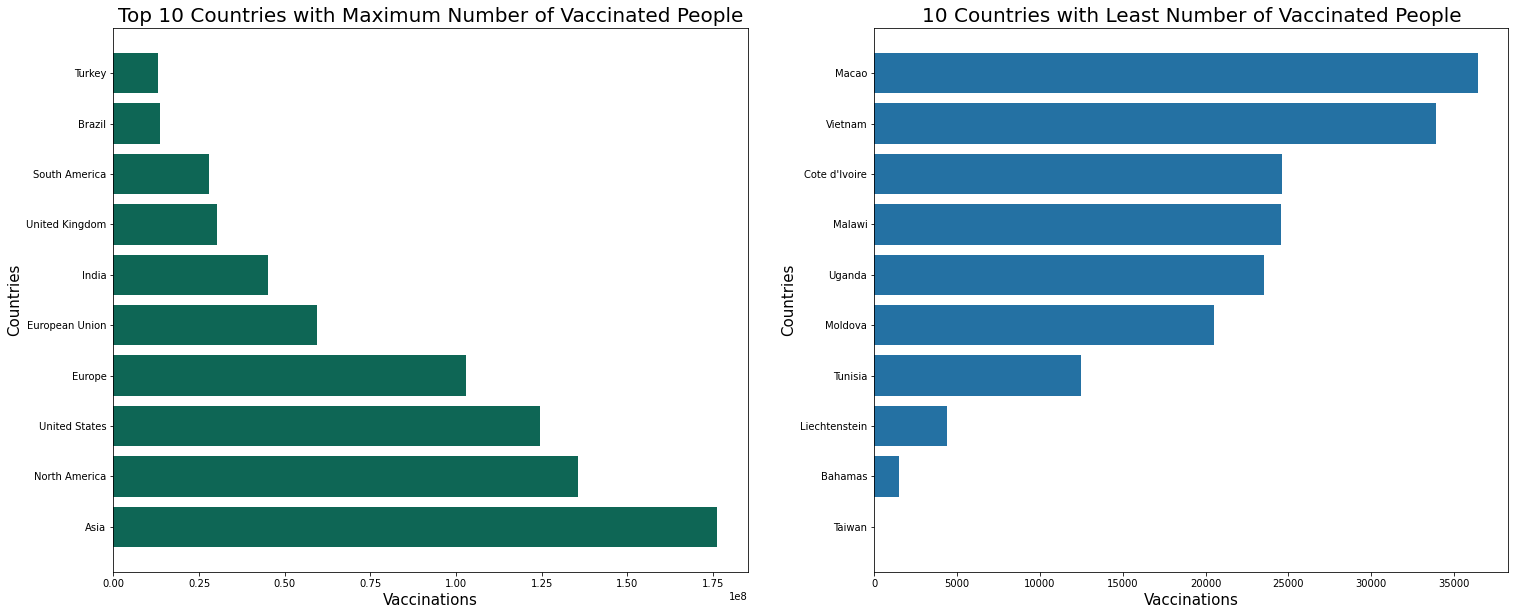

In [23]:
fig=plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.barh(max_vaccinated["location"][:10],max_vaccinated["total_vaccinations"][:10],color="#0E6655")
plt.title("Top 10 Countries with Maximum Number of Vaccinated People",fontsize=20)
plt.xlabel("Vaccinations",fontsize=15)
plt.ylabel("Countries",fontsize=15)
plt.subplot(1,2,2)
plt.barh(least_vaccinated["location"][:10],least_vaccinated["total_vaccinations"][:10],color="#2471A3")
plt.title("10 Countries with Least Number of Vaccinated People", fontsize=20)
plt.xlabel("Vaccinations",fontsize=15)
plt.ylabel("Countries",fontsize=15)

plt.show()

From graph 1, we can infer that United States is having the Maximum number of Vaccinated population followed by other nine countries. And From graph 2, it is observed that Belize is having least number of vaccinated population followed by other countries.

In [24]:
"""#Subplot of countries with maximum vaccinated people and least number of vaccinated people
vaccination_data1=asia_data[asia_data["date"]=="2021-04-20"]
vaccination_data1=vaccination_data1[~vaccination_data1["location"].isin(["World","International"])]
max_vaccinated1=vaccination_data1.sort_values("total_vaccinations",ascending= False)
least_vaccinated1=vaccination_data1.sort_values("total_vaccinations",ascending= True)
fig=plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.bar(max_vaccinated1["location"][:10],max_vaccinated1["total_vaccinations"][:10],color="#0E6655")
plt.title("Top 10 Countries with Maximum Number of Vaccinated People",fontsize=20)
plt.xlabel("Vaccinations",fontsize=15)
plt.ylabel("Countries",fontsize=15)
plt.subplot(1,2,2)
plt.bar(least_vaccinated1["location"][:10],least_vaccinated1["total_vaccinations"][:10],color="#2471A3")
plt.title("10 Countries with Least Number of Vaccinated People", fontsize=20)
plt.xlabel("Vaccinations",fontsize=15)
plt.ylabel("Countries",fontsize=15)

plt.show()"""

'#Subplot of countries with maximum vaccinated people and least number of vaccinated people\nvaccination_data1=asia_data[asia_data["date"]=="2021-04-20"]\nvaccination_data1=vaccination_data1[~vaccination_data1["location"].isin(["World","International"])]\nmax_vaccinated1=vaccination_data1.sort_values("total_vaccinations",ascending= False)\nleast_vaccinated1=vaccination_data1.sort_values("total_vaccinations",ascending= True)\nfig=plt.figure(figsize=(25,10))\nplt.subplot(1,2,1)\nplt.bar(max_vaccinated1["location"][:10],max_vaccinated1["total_vaccinations"][:10],color="#0E6655")\nplt.title("Top 10 Countries with Maximum Number of Vaccinated People",fontsize=20)\nplt.xlabel("Vaccinations",fontsize=15)\nplt.ylabel("Countries",fontsize=15)\nplt.subplot(1,2,2)\nplt.bar(least_vaccinated1["location"][:10],least_vaccinated1["total_vaccinations"][:10],color="#2471A3")\nplt.title("10 Countries with Least Number of Vaccinated People", fontsize=20)\nplt.xlabel("Vaccinations",fontsize=15)\nplt.ylabel